In [11]:
from opencv_wire_table_detector import WiredTableDetector
import cv2
from opencv_text_detector import TextPositionTableDetector
import json
import matplotlib.pyplot as plt

wire_detector = WiredTableDetector()
text_detector = TextPositionTableDetector()


In [3]:
# 创建检测器实例
detector = WiredTableDetector()

In [ ]:
image_path = "/Users/bingzhi/git/table_detection/table_detector-1/page_0.jpg"
tables = wire_detector.detect_tables(
    image_path=image_path,
    merge_tolerance=10,      # 合并容忍度
    max_area_ratio=0.35,     # 最大面积比(35%)
    min_area=40,            # 最小矩形面积(40像素)
    save_visualization=True, # 是否保存可视化
    edge_margin_ratio=0.002, # 边缘容忍度(0.2%)
    path='temp_2.jpg',
    filter_small_simple=True,
    min_size_threshold=0.0005
)

In [ ]:
result = wire_detector.detect_tables_with_text(
    image_path=image_path,
    text_detector=text_detector,
    text_method="all",
    merge_tolerance=10,
    max_area_ratio=0.35,
    edge_margin_ratio=0.002,
    min_quality_score=0.3,
    alignment_tolerance=18,
)

Processing image of size: (164954214 pixels)
Detected 1858 initial rectangles
Merge pass 1: 1842 -> 64 rectangles
Merge pass 2: 64 -> 48 rectangles
Merge pass 3: 48 -> 47 rectangles
Using absolute threshold: 5000 pixels (0.0% of image)
Filtered out 29 small simple rectangles
Extracting text regions from: /Users/bingzhi/git/table_detection/table_detector-1/page_0.jpg
Using all detection methods...
Spatial filtering overlapping MSER regions from 203439 regions...
Built spatial grid with 5879 occupied cells
Spatial filtering complete: kept 14777 regions (removed 188662)
Detected: 14777 regions before filtering
Quality filtering 14777 regions with confidence threshold 0.3...
Quality filtering complete: kept 14777 regions (removed 0)
Final result: 14777 text regions after quality filtering
Fast alignment analysis of 3957 regions...
Fast alignment found 121 rows and 472 columns
Fast alignment analysis of 1122 regions...
Fast alignment found 78 rows and 259 columns
Fast alignment analysis of 

(np.float64(-0.5), np.float64(19133.5), np.float64(8620.5), np.float64(-0.5))

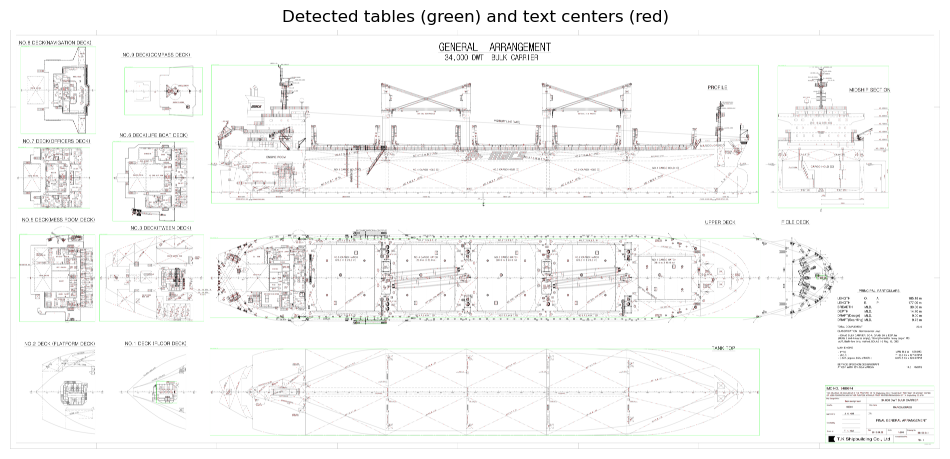

In [12]:
# 在原始图像上渲染表格和文本中心点
overlay = cv2.imread(image_path)
if overlay is None:
    raise ValueError(f"无法读取图像: {image_path}")

overlay_vis = overlay.copy()

# 绘制表格框
for table in result['tables']:
    x1, y1, x2, y2 = map(int, table['bbox'])
    cv2.rectangle(overlay_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label = f"{table['table_type']} ({table['sub_rectangles_count']})"
    cv2.putText(overlay_vis, label, (x1, max(y1 - 8, 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 绘制文本中心点
for frame_info in result['frame_text']['frames']:
    for region in frame_info['text_regions']:
        if 'center' in region and region['center'] is not None:
            cx, cy = map(int, region['center'])
            cv2.circle(overlay_vis, (cx, cy), 3, (0, 0, 255), -1)

overlay_rgb = cv2.cvtColor(overlay_vis, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(overlay_rgb)
plt.title("Detected tables (green) and text centers (red)")
plt.axis('off')

In [ ]:
# 导出表格检测结果到 JSON
export_path = wire_detector.export_tables(
    result['tables'],
    save_path="page_0_tables.json",
    include_sub_rectangles=True
 )
print(f"Table metadata saved to: {export_path}")

In [8]:
# 如需另存每个 frame 的文本分析结果
frame_text_path = "page_0_frame_text.json"
with open(frame_text_path, "w", encoding="utf-8") as fp:
    json.dump(result['frame_text'], fp, ensure_ascii=False, indent=2)
print(f"Frame-level text analysis saved to: {frame_text_path}")

Frame-level text analysis saved to: page_0_frame_text.json


In [9]:
tables

[{'id': 'merged_44',
  'bbox': [4114, 4297, 15450, 5922],
  'area': 18421000,
  'width': 11336,
  'height': 1625,
  'sub_rectangles_count': 61,
  'table_type': 'large_table',
  'merged_from': [1835, 1250],
  'confidence': 1.0},
 {'id': 'merged_15',
  'bbox': [7647, 1135, 13774, 2477],
  'area': 8222434,
  'width': 6127,
  'height': 1342,
  'sub_rectangles_count': 8,
  'table_type': 'medium_table',
  'merged_from': [4159,
   4160,
   4387,
   4157,
   4386,
   4925,
   4380,
   4152,
   4151,
   4379,
   4566,
   4381,
   4150,
   4376,
   4148,
   4147,
   4369,
   4146,
   4367,
   4558,
   4366,
   4145,
   4144,
   4143,
   4142,
   4361,
   4140,
   4357,
   4356,
   4552,
   4139,
   4138,
   4137,
   4136,
   4353,
   4352,
   4550,
   4349,
   4548,
   4350,
   4135,
   4347,
   4345,
   4133,
   4134,
   4344,
   4131,
   4130,
   4341,
   4340,
   4127,
   4128,
   4339,
   4126,
   4125,
   4336,
   4337,
   4124,
   4334,
   4333,
   4123,
   4122,
   4330,
   4541,
   4329,